<a href="https://colab.research.google.com/github/igorkokin1995/homeworks/blob/main/%C2%AB%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F_%D0%B8_%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%C2%BB_%D0%9A%D0%BE%D0%BA%D0%B8%D0%BD_DAU_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график

Рассчитать коэффициенты корреляции Пирсона и Спирмена

Построить модель линейной регрессии

Рассчитать коэффициент детерминации

Вывести график остатков

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [ ]:
def correl(DataFrame):
  DataFrame.plot(kind = 'scatter', title = 'Зависимость смертности от кальция в воде', 
          x = 'mortality', y = 'hardness', figsize = (10, 6))
  
  print(f'Коэффициент корреляции Пирсона\n'
        f'{round(DataFrame[["mortality", "hardness"]].corr(), 2)}\n')
  
  print(f'Коэффициент корреляции Спирмана\n'
        f'{round(DataFrame[["mortality", "hardness"]].corr(method = "spearman"), 2)}\n')

Коэффициент корреляции Пирсона
           mortality  hardness
mortality       1.00     -0.65
hardness       -0.65      1.00

Коэффициент корреляции Спирмана
           mortality  hardness
mortality       1.00     -0.63
hardness       -0.63      1.00



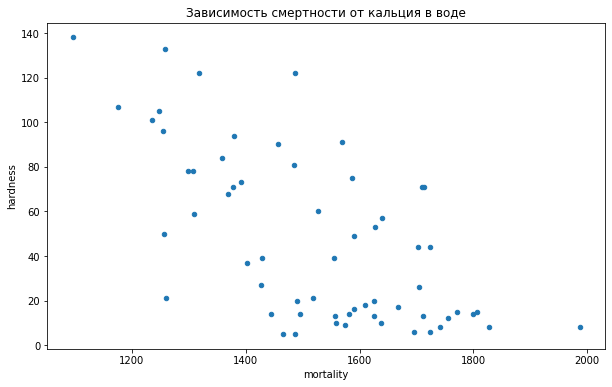

In [ ]:
correl(df)

Коэффициенты корреляции Пирсона и Спирмана говорят об умеренной обратной зависимости.
Обнако, исходя из логики, вряд ли увеличение кальция в воде уменьшает смертность. Хотя и может влиять косвенно, т.к. кальций полезен для организма человека.

In [ ]:
def regress(DataFrame):
  X = DataFrame[['hardness']]
  y = DataFrame['mortality']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) #разделение данных на обучающие и тестовые

  model = LinearRegression() #построение модели
  model.fit(X_train, y_train) #обучение модели  

  print(f'Уравнение линейной регрессии:\n'
        f'{round(model.coef_[0],2)}*X + {round(model.intercept_,2)}\n')
  
  y_pred = model.predict(X_test)

  print(f'Коэффициент детерминации\n'
        f'{round(model.score(X_test, y_test), 2)}\n') #коэффициент детерминации

  plt.figure(figsize = (10, 6))
  plt.scatter(X_test, y_test)
  plt.plot(X_test, y_pred, c='r')
  plt.title('Линейная регрессия')

  plt.figure(figsize = (10, 6))
  residuals = y_test - y_pred # остатки
  plt.scatter(X_test, residuals)
  plt.title('Остатки')

Уравнение линейной регрессии:
-3.32*X + 1678.94

Коэффициент детерминации
0.41



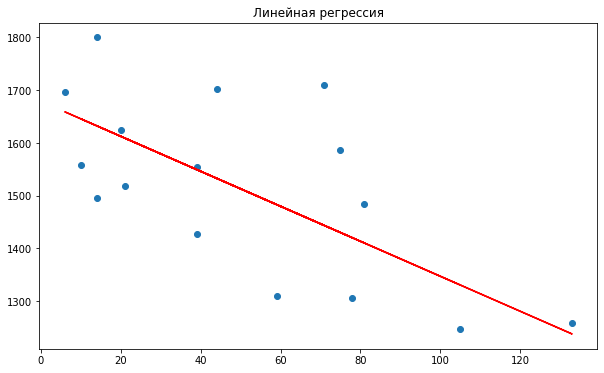

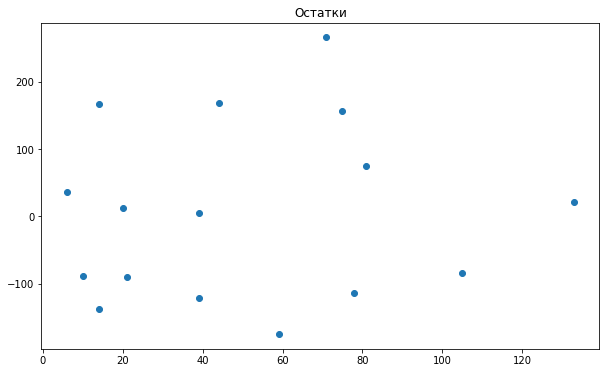

In [ ]:
regress(df)

Коэффициент детерминации = -0,41 говорит о плохом качестве модели. 

###Задание 2.

Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [ ]:
df_south = df[df['location'] == 'South']
df_south.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


In [ ]:
df_north = df[df['location'] == 'North']
df_north.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


Коэффициент корреляции Пирсона
           mortality  hardness
mortality        1.0      -0.6
hardness        -0.6       1.0

Коэффициент корреляции Спирмана
           mortality  hardness
mortality        1.0      -0.6
hardness        -0.6       1.0



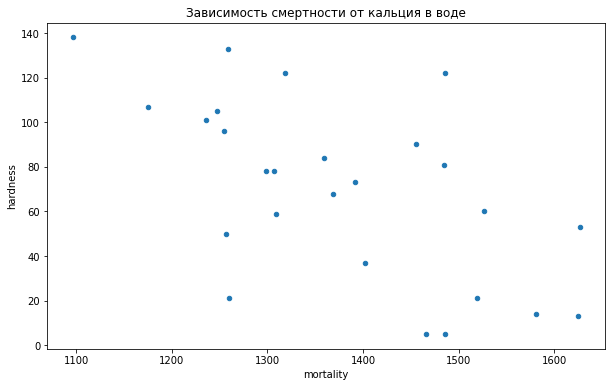

In [ ]:
correl(df_south)

Коэффициент корреляции только для южных регионов практически не изменился. 

Уравнение линейной регрессии:
-3.12*X + 1604.27

Коэффициент детерминации
-2.08



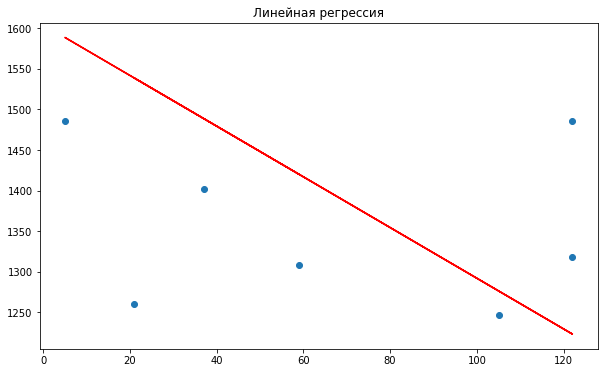

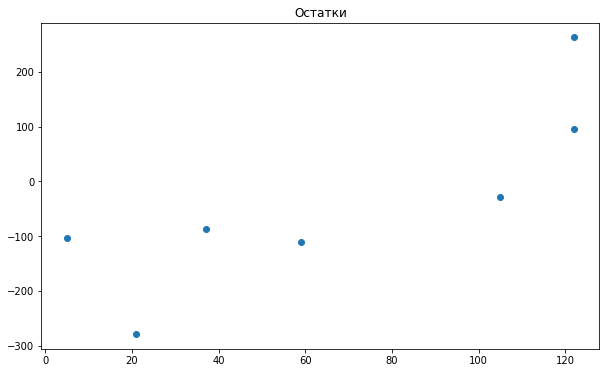

In [ ]:
regress(df_south)

Коэффициент детерминации отрицательный. Модель хуже наивной.

Данную модель рассматривать нельзя.

Коэффициент корреляции Пирсона
           mortality  hardness
mortality       1.00     -0.37
hardness       -0.37      1.00

Коэффициент корреляции Спирмана
           mortality  hardness
mortality        1.0      -0.4
hardness        -0.4       1.0



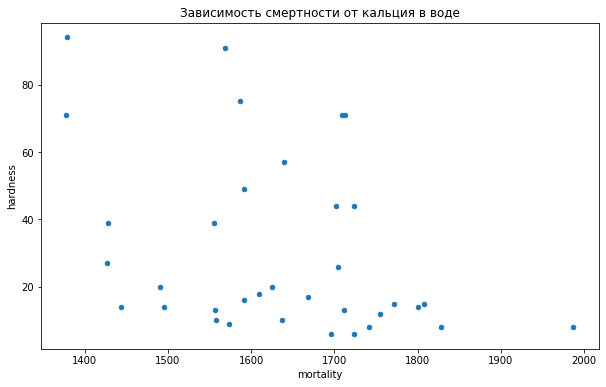

In [ ]:
correl(df_north)

Коэффициент корреляции для северных регионов снизился.

Зависимость стала более слабой.

Уравнение линейной регрессии:
-2.15*X + 1691.02

Коэффициент детерминации
-0.1



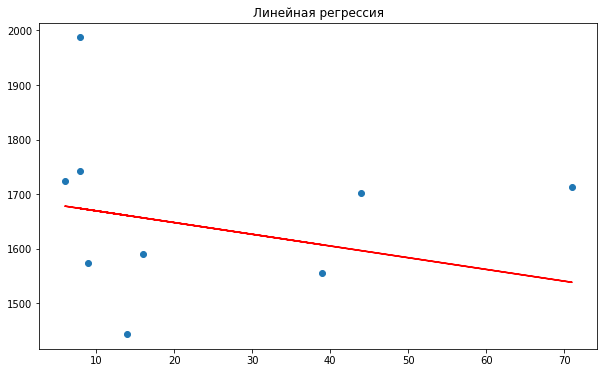

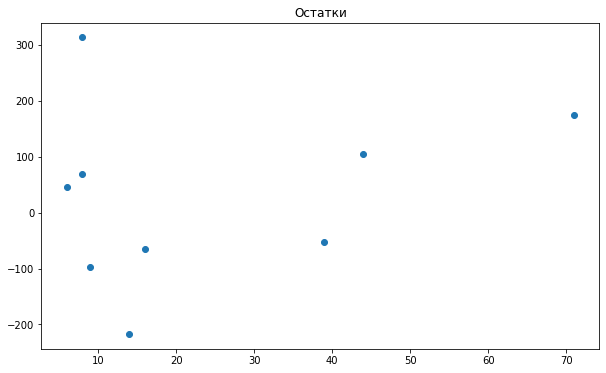

In [ ]:
regress(df_north)

Коэффициент детерминации отрицательный. Модель хуже наивной.

Данную модель рассматривать нельзя.